## Import Library

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report

import joblib

## Import Dataset

In [2]:
path_to_data = "D:/0 Orbit Proyek Akhir/BADUTA-BATITA KEMRANJEN.xlsx" # Path to the Excel file
dataset = pd.read_excel(path_to_data)
dataset.head()

,KodeSampel,NamaBaduta,JenisKelamin,TanggalLahir,UmurBaduta,AnakKe,JumlahAnak,BBLahir,PBLahir,TanggalUkur,...,MerkGaram,BeratGaram,HargaGaram,PmrksaanIodium,VAR00001,VAR00002,VAR00003,VAR00004,VAR00005,Status
0,1101.0,Hana Nur Azizah,2.0,2018-07-16 00:00:00,8.0,1.0,1.0,3.0,50.0,2019-04-10 00:00:00,...,Daun,250.0,2500.0,1.0,1.0,1.0,2.0,2.0,1.0,tidak stunting
1,1102.0,Aqila Shakuena Humaira,2.0,2018-03-13 00:00:00,13.0,1.0,1.0,2.5,47.0,2019-04-10 00:00:00,...,Daun,250.0,2500.0,1.0,2.0,2.0,1.0,1.0,2.0,tidak stunting
2,1103.0,Altan Artanabil Setiawan,1.0,2018-07-09 00:00:00,9.0,2.0,2.0,3.4,50.0,2019-04-10 00:00:00,...,Daun,250.0,2500.0,1.0,1.0,1.0,1.0,2.0,1.0,stunting
3,1104.0,Adrian Pradita Maspuri,1.0,2017-05-25 00:00:00,23.0,1.0,1.0,2.1,39.0,2019-04-10 00:00:00,...,Daun,250.0,2500.0,1.0,2.0,2.0,2.0,2.0,1.0,tidak stunting
4,1105.0,Yaqis Hagata,1.0,2018-06-28 00:00:00,8.0,3.0,3.0,2.9,45.0,2019-04-10 00:00:00,...,Daun,250.0,2500.0,1.0,1.0,1.0,1.0,1.0,2.0,tidak stunting


## Exploratory Data Analysis (EDA)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Columns: 172 entries, KodeSampel to Status
dtypes: float64(155), object(17)
memory usage: 748.6+ KB


In [4]:
dataset = dataset[["UmurBaduta", "PBSekarang", "BBSekarang", "Status"]]
dataset

,UmurBaduta,PBSekarang,BBSekarang,Status
0,8.0,60.3,8.3,tidak stunting
1,13.0,80.1,9.7,tidak stunting
2,9.0,75.0,8.6,stunting
3,23.0,87.0,11.0,tidak stunting
4,8.0,86.3,8.1,tidak stunting
...,...,...,...,...
552,10.0,71.0,8.1,tidak stunting
553,17.0,80.2,12.3,tidak stunting
554,7.0,72.3,78.0,tidak stunting
555,7.0,71.0,9.9,tidak stunting


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UmurBaduta  550 non-null    float64
 1   PBSekarang  550 non-null    float64
 2   BBSekarang  550 non-null    float64
 3   Status      550 non-null    object 
dtypes: float64(3), object(1)
memory usage: 17.5+ KB


In [6]:
dataset.describe()

,UmurBaduta,PBSekarang,BBSekarang
count,550.000000,550.000000,550.000000
mean,13.707273,77.590000,9.672091
std,7.384554,31.765915,5.640462
min,1.000000,60.000000,5.500000
25%,8.250000,71.000000,8.200000
50%,13.000000,75.700000,9.300000
75%,20.000000,81.000000,10.300000
max,37.000000,803.000000,116.000000


In [7]:
dataset.isna().sum()

UmurBaduta    7
PBSekarang    7
BBSekarang    7
Status        7
dtype: int64

In [8]:
dataset.dropna(inplace = True)

In [9]:
dataset.isna().sum()

UmurBaduta    0
PBSekarang    0
BBSekarang    0
Status        0
dtype: int64

In [10]:
dataset["Status"].value_counts()

tidak stunting    491
stunting           59
Name: Status, dtype: int64

<AxesSubplot:xlabel='Status', ylabel='count'>

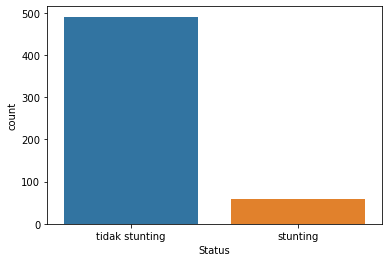

In [11]:
sns.countplot(x='Status', data=dataset)

<AxesSubplot:xlabel='Status', ylabel='BBSekarang'>

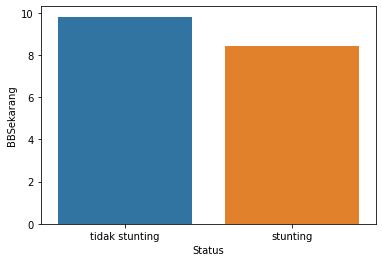

In [13]:
sns.barplot(x='Status', y='BBSekarang', data=dataset, ci=None)

<AxesSubplot:xlabel='Status', ylabel='PBSekarang'>

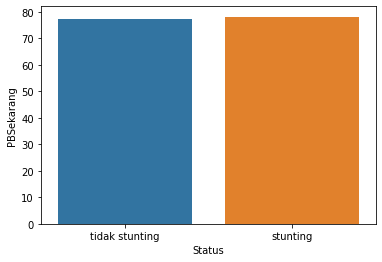

In [14]:
sns.barplot(x='Status', y='PBSekarang', data=dataset, ci=None)

<AxesSubplot:xlabel='Status', ylabel='UmurBaduta'>

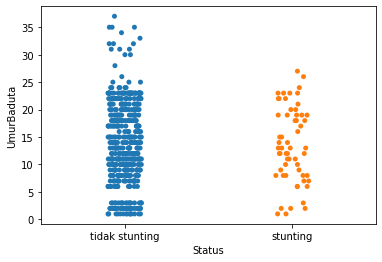

In [15]:
sns.stripplot(x='Status', y='UmurBaduta', data=dataset)

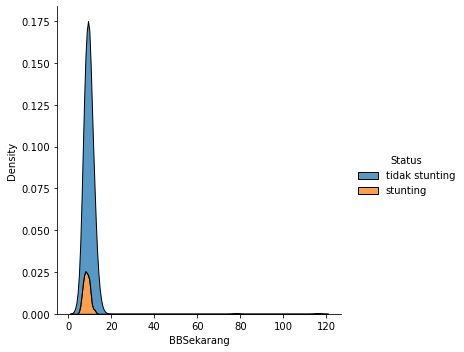

In [17]:
sns.displot(data=dataset, x="BBSekarang", hue="Status", multiple="stack", kind="kde")

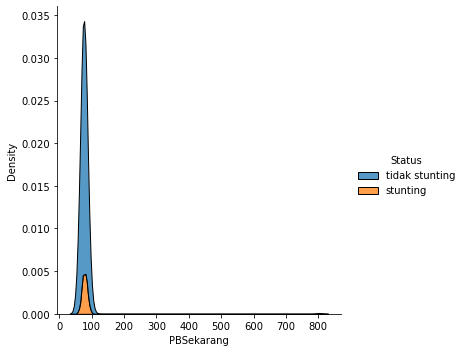

In [18]:
sns.displot(data=dataset, x="PBSekarang", hue="Status", multiple="stack", kind="kde")

## Training Model

In [19]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [20]:
x

,UmurBaduta,PBSekarang,BBSekarang
0,8.0,60.3,8.3
1,13.0,80.1,9.7
2,9.0,75.0,8.6
3,23.0,87.0,11.0
4,8.0,86.3,8.1
...,...,...,...
552,10.0,71.0,8.1
553,17.0,80.2,12.3
554,7.0,72.3,78.0
555,7.0,71.0,9.9


In [21]:
y

0      tidak stunting
1      tidak stunting
2            stunting
3      tidak stunting
4      tidak stunting
            ...      
552    tidak stunting
553    tidak stunting
554    tidak stunting
555    tidak stunting
556          stunting
Name: Status, Length: 550, dtype: object

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [23]:
model_dt = DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=20)
model_rf = RandomForestClassifier(max_depth=20, random_state=0)
model_logres = LogisticRegression(random_state=0)
model_dt = model_dt.fit(x_train, y_train)
model_rf = model_rf.fit(x_train, y_train)
model_logres = model_logres.fit(x_train, y_train)

## Evaluasi Model

In [24]:
accuracy_train_dt = model_dt.score(x_train, y_train)
accuracy_test_dt  = model_dt.score(x_test, y_test)
accuracy_train_rf = model_rf.score(x_train, y_train)
accuracy_test_rf  = model_rf.score(x_test, y_test)
accuracy_train_logres = model_logres.score(x_train, y_train)
accuracy_test_logres  = model_logres.score(x_test, y_test)

In [25]:
print(f"Akurasi Model (Train) : {np.round(accuracy_train_dt * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test_dt * 100,2)} %")

Akurasi Model (Train) : 99.77 %
Akurasi Model (Test)  : 83.64 %


In [26]:
print(f"Akurasi Model (Train) : {np.round(accuracy_train_rf * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test_rf * 100,2)} %")

Akurasi Model (Train) : 99.77 %
Akurasi Model (Test)  : 89.09 %


In [27]:
print(f"Akurasi Model (Train) : {np.round(accuracy_train_logres * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test_logres * 100,2)} %")

Akurasi Model (Train) : 89.09 %
Akurasi Model (Test)  : 90.0 %


In [28]:
df_test = pd.DataFrame(data={
    "UmurBaduta" : [3],
    "PBLahir"  : [50],
    "BBLahir"  : [4]
})

df_test[0:1]

,UmurBaduta,PBLahir,BBLahir
0,3,50,4


In [29]:
pred_test = model_rf.predict(df_test[0:1])
pred_test[0]

C:\Users\Indah Wardatunizza\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- BBLahir
- PBLahir
Feature names seen at fit time, yet now missing:
- BBSekarang
- PBSekarang

  warnings.warn(message, FutureWarning)


'tidak stunting'

In [30]:
y_pred = model_rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 2  9]
 [ 3 96]]


In [31]:
target_names = ["stunting", "tidak stunting"]
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

      stunting       0.40      0.18      0.25        11
tidak stunting       0.91      0.97      0.94        99

      accuracy                           0.89       110
     macro avg       0.66      0.58      0.60       110
  weighted avg       0.86      0.89      0.87       110



## Save Model

In [32]:
joblib.dump((model_rf), "D:/0 Orbit Proyek Akhir/model_rf.model")

['D:/0 Orbit Proyek Akhir/model_rf.model']